# <center> Analyzing National Highway Traffic Safety Administration Complaints Data 
 </center>



####  Analyze some aspect that you find interesting of the complains of different car and manufacture (Mainly with in the years 2003-2007)

# Introduction

In this project we learn the importance of a data set and it's uses. **Data set** is a collection of data records for computer processing ,  where we can find insights by analysing the data set and also mark out our inferences from the results we just found, we learnt the concept of **Web scraping** which is a technique employed to extract large amounts of data from websites whereby the data is extracted and saved to a local file in your computer or to a database in table and can be displayed on a spread sheet 

In this project we were give access to **National Highway Traffic Safety Administration Complaints Data** , Our goal was to understand the data set and find out some interesting insights and patterns from the data set. 




First we start the project by analysing the data set we were given initially , we start web scraping the data , where our given focus is in the year 2003-2007 where the car manufacturers like honda ,chevrolet and nissan had complaints, where we take an account of every year the newer model facing issues by the people driving it and incase there are accident and injuries reported for the same .Interpreting the data like this we should be able to conclude which manufacturer had the least complaints / which car is the safest to drive.

## Necessary Modules

In [23]:

import requests as re
import json
import pandas as pd
from io import StringIO as SIO

## Dataset preparation 


In [24]:
url0 = 'http://www.nhtsa.gov/webapi/api/Complaints/vehicle/modelyear/{}/make/{}/model/{}?format=csv'
years = [ '2003','2004','2005','2006','2007']
make_model = ['chevrolet-Malibu','Nissan-Altima','Honda-Civic']
df = pd.DataFrame()
for year in years:
    for i in range(3):
        url = url0.format(year,make_model[i].split('-')[0],make_model[i].split('-')[1])
        #print(url)
        s = re.get(url).text  # this is a CSV string
        
        temp_df = pd.read_csv(SIO(s),usecols=[1,4,5,6,7,9,12,13,14])
        df = df.append(temp_df,ignore_index=True)
        
        #print(df.shape)
        #print(len(df.index))  #fastest than df.shape

In [25]:
df.head()

,MFR_NAME,NUM_INJURED,NUM_DEATHS,INCIDENT_DT,RECVD_DT,COMPONENT,MODEL_YR,MAKE,MODEL
0,General Motors LLC,0,0,2005-05-19,2005-05-19T15:05:48Z,ELECTRICAL SYSTEM:IGNITION:ANTI-THEFT CONTROLLER,2003,CHEVROLET,MALIBU
1,General Motors LLC,0,0,2008-05-15,2008-05-26,ELECTRICAL SYSTEM,2003,CHEVROLET,MALIBU
2,General Motors LLC,0,0,2004-05-17,2004-10-15,ENGINE AND ENGINE COOLING,2003,CHEVROLET,MALIBU
3,General Motors LLC,0,0,2007-12-12,2011-07-20,EQUIPMENT:AIR CONDITIONER,2003,CHEVROLET,MALIBU
4,General Motors LLC,0,0,2013-08-14,2014-09-18,ELECTRICAL SYSTEM:IGNITION:SWITCH,2003,CHEVROLET,MALIBU


In [26]:
df.columns = ['MFR','Injury_count','Death_count','Incident_date','Complaint_date','Components','Model_yr','Make','Model']

In [27]:
df.head(2)

,MFR,Injury_count,Death_count,Incident_date,Complaint_date,Components,Model_yr,Make,Model
0,General Motors LLC,0,0,2005-05-19,2005-05-19T15:05:48Z,ELECTRICAL SYSTEM:IGNITION:ANTI-THEFT CONTROLLER,2003,CHEVROLET,MALIBU
1,General Motors LLC,0,0,2008-05-15,2008-05-26,ELECTRICAL SYSTEM,2003,CHEVROLET,MALIBU


In [28]:
df.shape

(11031, 9)

In [29]:
df1 = df[['Make','Model','Model_yr']].groupby(['Make','Model','Model_yr']).size().reset_index(name='counts')

In [30]:
print(df1)

         Make   Model  Model_yr  counts
0   CHEVROLET  MALIBU      2003     544
1   CHEVROLET  MALIBU      2004    1077
2   CHEVROLET  MALIBU      2005     867
3   CHEVROLET  MALIBU      2006     936
4   CHEVROLET  MALIBU      2007     822
5       HONDA   CIVIC      2003     458
6       HONDA   CIVIC      2004     319
7       HONDA   CIVIC      2005     277
8       HONDA   CIVIC      2006    1296
9       HONDA   CIVIC      2007    1087
10     NISSAN  ALTIMA      2003     866
11     NISSAN  ALTIMA      2004     272
12     NISSAN  ALTIMA      2005    1029
13     NISSAN  ALTIMA      2006     764
14     NISSAN  ALTIMA      2007     417


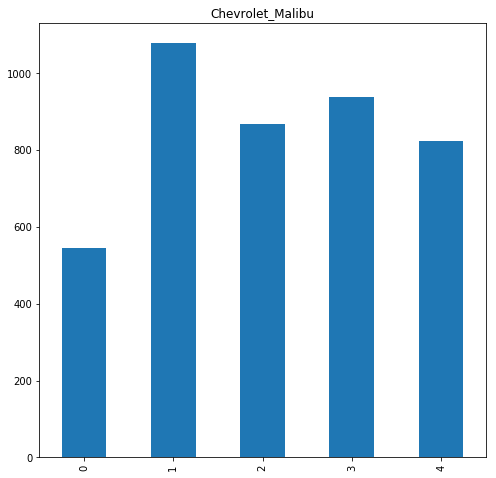

In [31]:
get_ipython().run_line_magic('matplotlib', 'inline')
df1[(df1.Make == 'CHEVROLET') & (df1.Model == 'MALIBU')].counts.plot(kind='bar', title ="Chevrolet_Malibu", figsize=(8,8))

** No.of years 0=2003,1=2004,2=2005,3=2006,4=2007**

In the graph above we see the number of complaints of the **Chevrolet malibu** over the year where we each year , each model of the car always had complaint , 2004 they had the most complaints , where as 2003 they had the least this is definately not a positive sign for any automobile company .

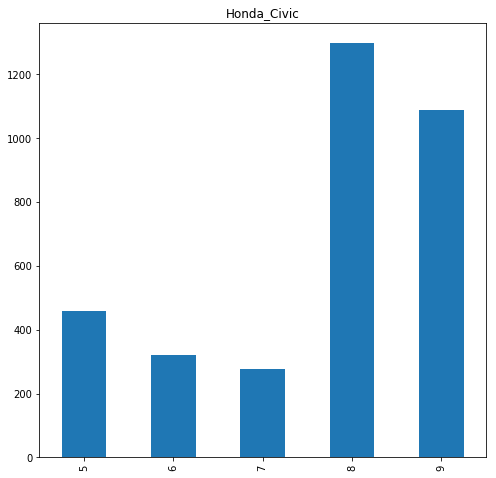

In [32]:
df1[(df1.Make == 'HONDA') & (df1.Model == 'CIVIC')].counts.plot(kind='bar', title ="Honda_Civic", figsize=(8,8))

** No.of years 5=2003,6=2004,7=2005,8=2006,9=2007**

In the graph above we see the number of complaints of the **Honda Civic** over the year where we each year , each model of the car always had complaint but very minimal comparing to the other data sets we notice ,but honda civiv in 2006 had the most number of complaints 

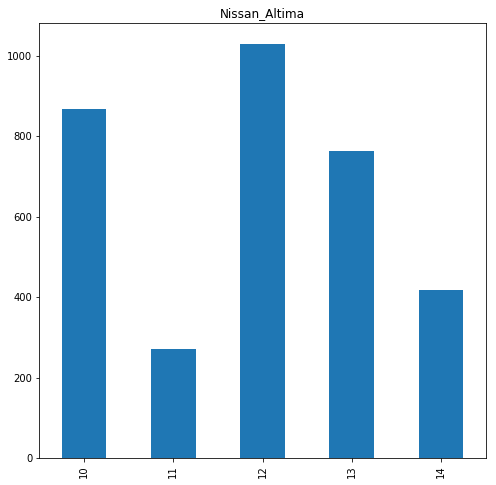

In [33]:
df1[(df1.Make == 'NISSAN') & (df1.Model == 'ALTIMA')].counts.plot(kind='bar', title ="Nissan_Altima", figsize=(8,8))

** No.of years 10=2003,11=2004,12=2005,13=2006,14=2007**

In the graph above we see the number of complaints of the **Nissan Altima** over the year where we each year , each model of the car always had complaint but very mixed combination range comparing to the other data sets we notice ,but Nissan altima  in 2005 had the most number of complaints . In 2004 had the least number of complaints .

# Conclusion 

From this project we considered three different cars over the period of five years **chevrolet-Malibu','Nissan-Altima','Honda-Civic** where we look at the complains filed over the period of 5 years from **2003-2005** from the graph we plotted after comparing the graphs we notice that chevrolet had consistently the maximum complains, Nissan was in the middle, and the least complains were filed in Honda .

## Sources 

 https://www.usatoday.com/story/money/cars/ <br>
 
https://www.dictionary.com/ <br>

https://stackoverflow.com/,<br>

https://geeksforgeeks.org/<br>
